In [1]:
# Author: Roy Li (Primary), ChatGPT 4.0 (Support)

import pandas as pd
import networkx as nx
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import girvan_newman
import itertools

import numpy as np

np.random.seed(1)


csv_file_path = '/content/ProcessedFalseScaled.csv'

df = pd.read_csv(csv_file_path)

G_false = nx.Graph()

for index, row in df.iterrows():
    G_false.add_edge(row['Source'], row['Target'], weight=row['Co_Occurrence'])

In [2]:
import numpy as np

np.random.seed(1)


csv_file_path = '/content/ProcessedTrueScaled.csv'

df = pd.read_csv(csv_file_path)

G_true = nx.Graph()

for index, row in df.iterrows():
    G_true.add_edge(row['Source'], row['Target'], weight=row['Co_Occurrence'])

In [3]:
import numpy as np

np.random.seed(1)

all_nodes_false = list(G_false.nodes)
print(len(all_nodes_false))
all_nodes_true = list(G_true.nodes)
print(len(all_nodes_true))

merged_nodes = list(set(all_nodes_false + all_nodes_true))

print(len(merged_nodes))

2614
2425
3354


In [4]:
import numpy as np

np.random.seed(1)


csv_file_path_false = '/content/ProcessedFalseScaled.csv'
csv_file_path_true = '/content/ProcessedTrueScaled.csv'

df_false = pd.read_csv(csv_file_path_false)
df_true = pd.read_csv(csv_file_path_true)

G_initial = nx.Graph()

for index, row in df_false.iterrows():
    G_initial.add_edge(row['Source'], row['Target'], weight=row['Co_Occurrence'])

for index, row in df_true.iterrows():
    G_initial.add_edge(row['Source'], row['Target'], weight=row['Co_Occurrence'])

# all_nodes_false = list(G_false.nodes)
# print(len(all_nodes_false))
# all_nodes_true = list(G_true.nodes)
# print(len(all_nodes_true))

# gml_file_path = 'G_initial.gml'
# nx.write_gml(G_initial, gml_file_path)


In [5]:
import numpy as np

np.random.seed(1)

gml_file_path = 'G_initial.gml'
nx.write_gml(G_initial, gml_file_path)

In [6]:
import numpy as np

np.random.seed(1)


csv_file_path_false = '/content/ProcessedFalseScaled.csv'
csv_file_path_true = '/content/ProcessedTrueScaled.csv'

df_false = pd.read_csv(csv_file_path_false)
df_true = pd.read_csv(csv_file_path_true)

G_initial_step2 = nx.Graph()

for index, row in df_false.iterrows():
    G_initial_step2.add_edge(row['Source'], row['Target'], weight=row['Co_Occurrence'])

for index, row in df_true.iterrows():
    G_initial_step2.add_edge(row['Source'], row['Target'], weight=row['Co_Occurrence'])

for node in G_initial_step2.nodes():
    if node in G_false and node in G_true:
        G_initial_step2.nodes[node]['truth'] = 'mix'
    elif node in G_false:
        G_initial_step2.nodes[node]['truth'] = 'false'
    elif node in G_true:
        G_initial_step2.nodes[node]['truth'] = 'true'
    else:
        G_initial_step2.nodes[node]['truth'] = 'unknown'


for node, data in G_initial_step2.nodes(data=True):
    if data['truth'] == 'mix':
        degree_false = G_false.degree(node) if node in G_false else 0
        degree_true = G_true.degree(node) if node in G_true else 0

        if degree_false > degree_true:
            G_initial_step2.nodes[node]['truth'] = 'false'
        elif degree_true > degree_false:
            G_initial_step2.nodes[node]['truth'] = 'true'

gml_file_path = 'G_initial_step3.gml'
nx.write_gml(G_initial_step2, gml_file_path)



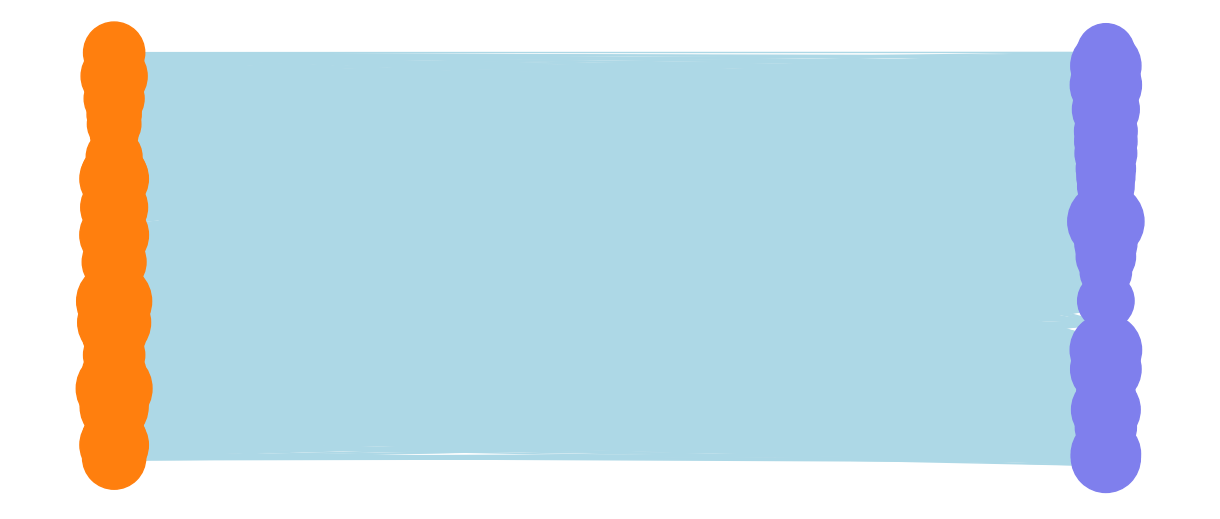

In [8]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

gml_file_path = '/content/G_initial_step3.gml'
G = nx.read_gml(gml_file_path)

x_coords = {'true': 0, 'false': 1, 'mix': 2}

pos = {node: (x_coords[G.nodes[node]['truth']], np.random.uniform()) for node in G.nodes()}

k_core_graph = nx.k_core(G, k=75)

k_core_pos = {node: pos[node] for node in k_core_graph.nodes()}


truth_colors = {
    'true': '#FF7F0E', 
    'false': '#7F7FED',
    'mix': '#2CA02C', 
}


k_core_node_colors = [truth_colors[k_core_graph.nodes[node]['truth']] for node in k_core_graph.nodes()]
k_core_node_sizes = [k_core_graph.degree(node) * 10 for node in k_core_graph.nodes()]

plt.figure(figsize=(12, 5))
nx.draw(k_core_graph, k_core_pos, with_labels=False, node_color=k_core_node_colors, node_size=k_core_node_sizes, edge_color='lightblue')
plt.savefig('/content/step3.png', bbox_inches='tight')

plt.show()


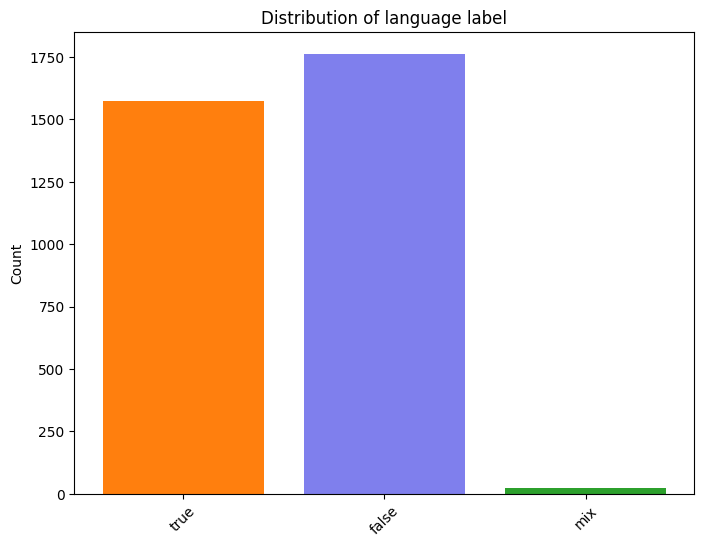

In [9]:
import matplotlib.pyplot as plt
import networkx as nx

gml_file_path = '/content/G_initial_step3.gml'
G = nx.read_gml(gml_file_path)

truth_counts = {'true': 0, 'false': 0, 'mix': 0}
for node in G.nodes(data=True):
    truth = node[1]['truth']
    if truth in truth_counts:
        truth_counts[truth] += 1

labels = list(truth_counts.keys())

values = list(truth_counts.values())
colors = ['#FF7F0E','#7F7FED','#2CA02C']


plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=colors)
# plt.xlabel('Truth Value')
plt.ylabel('Count')
plt.title('Distribution of language label')
plt.xticks(rotation=45)
plt.savefig('histogram.png')
plt.show()


In [ ]:
import community.community_louvain
from collections import Counter


import numpy as np

np.random.seed(1)


gml_file_path = '/content/G_initial_step3.gml'
G = nx.read_gml(gml_file_path)

partition = community.community_louvain.best_partition(G)

community_sizes = Counter(partition.values())

for comm_id, size in community_sizes.items():
    print(f" commu {comm_id} size: {size}")




In [11]:
for node, community_id in partition.items():
    nx.set_node_attributes(G, {node: {'community': community_id}})

updated_gml_file_path = 'G_with_communities.gml'
nx.write_gml(G, updated_gml_file_path)



One-sided T-test results for checking if false is greater than true:
T-statistic: 2.4722677706623486
P-value: 0.010144402125676997


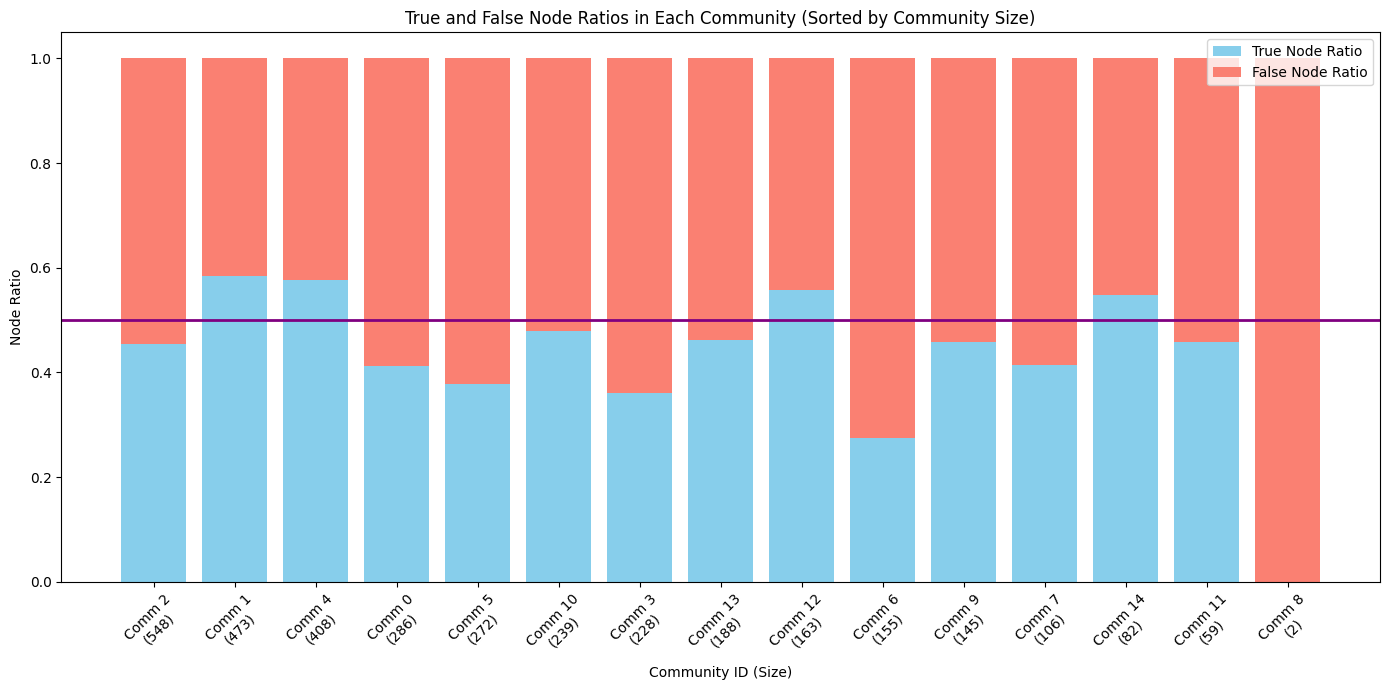

In [13]:
import community.community_louvain
from collections import Counter
from scipy.stats import ttest_ind

import numpy as np

np.random.seed(1)


gml_file_path = '/content/G_initial_step3.gml'
G = nx.read_gml(gml_file_path)

partition = community.community_louvain.best_partition(G)


community_sizes = Counter(partition.values())


community_truth_counts = {comm_id: {'true': 0, 'false': 0} for comm_id in community_sizes}

for node, comm_id in partition.items():
    truth_value = G.nodes[node]['truth']
    if truth_value in ['true', 'false']:
        community_truth_counts[comm_id][truth_value] += 1

sorted_communities_by_size = sorted(community_sizes.items(), key=lambda x: x[1], reverse=True)

true_ratios = [community_truth_counts[comm]['true'] / sum(community_truth_counts[comm].values()) for comm, _ in sorted_communities_by_size if sum(community_truth_counts[comm].values()) > 0]
false_ratios = [community_truth_counts[comm]['false'] / sum(community_truth_counts[comm].values()) for comm, _ in sorted_communities_by_size if sum(community_truth_counts[comm].values()) > 0]


t_stat, p_value = ttest_ind(false_ratios[:-1], true_ratios[:-1], alternative='greater')

print("One-sided T-test results for checking if false is greater than true:")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


community_labels = [f"Comm {comm}\n({size})" for comm, size in sorted_communities_by_size]

plt.figure(figsize=(14, 7))
plt.bar(community_labels, true_ratios, color='skyblue', label='True Node Ratio')
plt.bar(community_labels, false_ratios, bottom=true_ratios, color='salmon', label='False Node Ratio')

plt.axhline(y=0.5, color='purple', linestyle='-', linewidth=2)


plt.xlabel('Community ID (Size)')
plt.ylabel('Node Ratio')
plt.title('True and False Node Ratios in Each Community (Sorted by Community Size)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()



output_file_path = 'G_step4.png'
plt.savefig(output_file_path)

plt.show()